In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
raw = pd.read_csv(r"C:\Users\USER\Downloads\Fruit Prices 2020.csv")
data = raw.copy()

In [ ]:
data['FruitLabel'] = data['Fruit'].str.split(',|\(,|\ ', expand=True)[0]

In [14]:
#Descriptive Statistics: basic statistics- mean,median, mode, range,
#and standard deviation for prices and quantities.

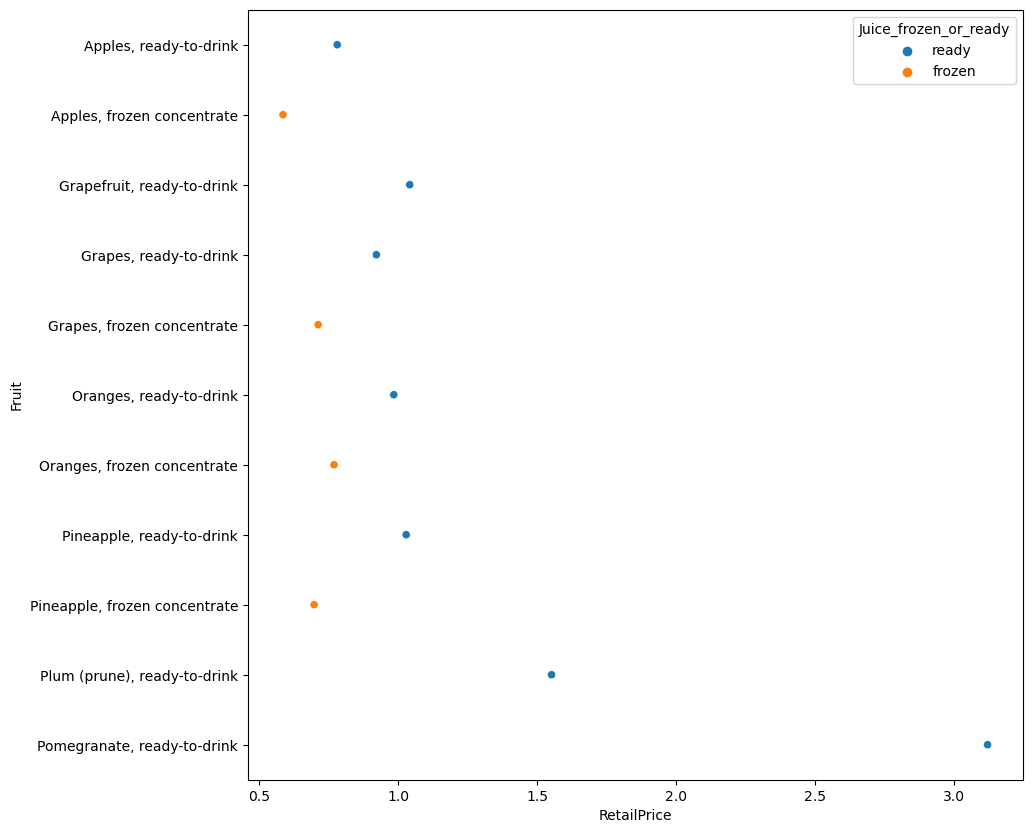

In [13]:
#creating categorical representation of Fruit only for Juice
def frozen_or_ready(fruit):
    if "ready-to-drink" in fruit:
        return "ready"
    elif "frozen" in fruit:
        return "frozen"
    else:
        return np.nan
# checing the diffrent between two tipes of juices        
data['Juice_frozen_or_ready'] = data['Fruit'].apply(frozen_or_ready)
fig,axe = plt.subplots(figsize = (10,10))
sns.scatterplot(data = data[data['Form'] == 'Juice'],y='Fruit',x='RetailPrice',hue='Juice_frozen_or_ready')
plt.show()

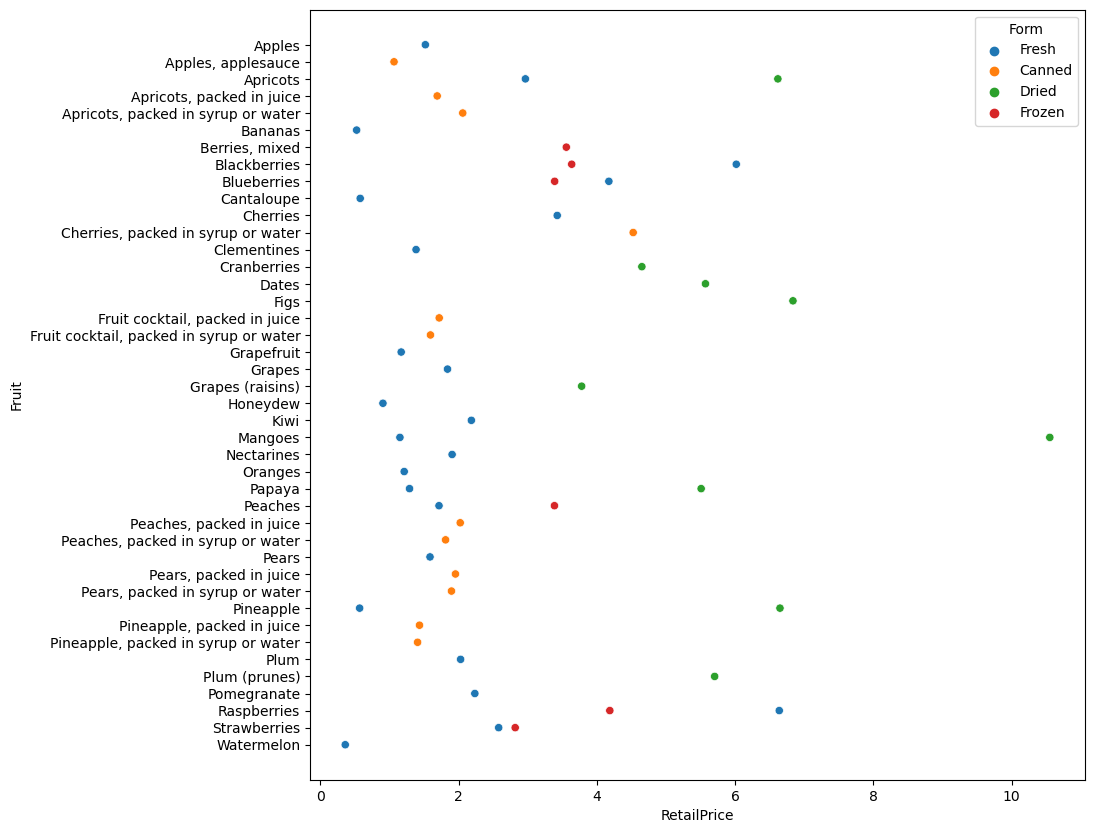

In [10]:

fig,axe = plt.subplots(figsize = (10,10))
sns.scatterplot(data = data[data['Form'] != 'Juice'],y='Fruit',x='RetailPrice',hue='Form')
plt.show()

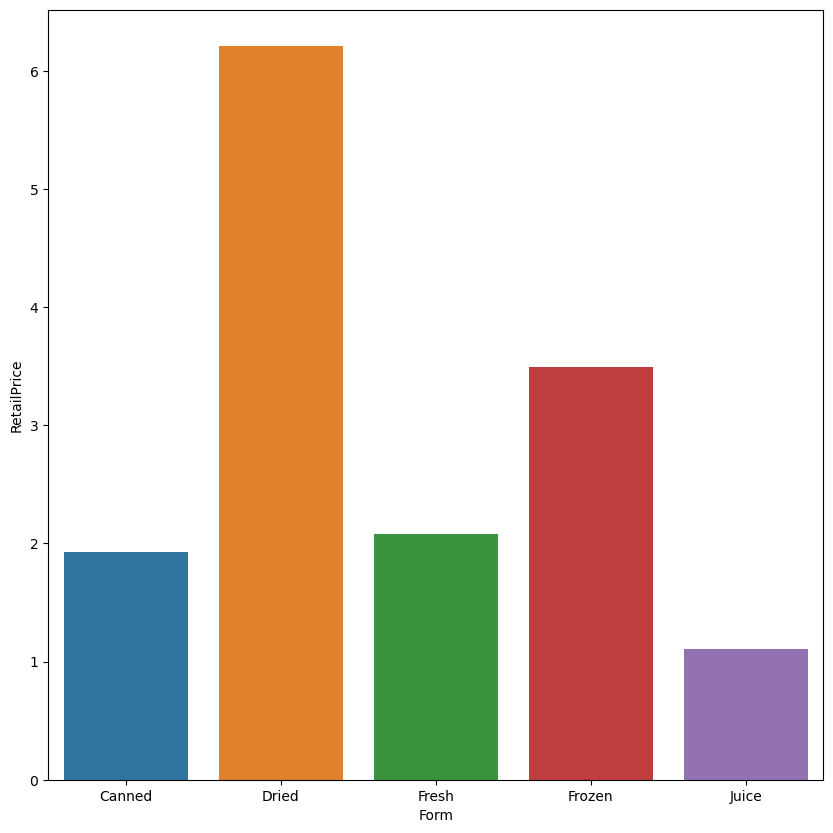

In [64]:
fig,axe = plt.subplots(figsize = (10,10))
sns.barplot(data = data[['Form','RetailPrice','CupEquivalentPrice']].groupby(['Form']).mean().reset_index(),x = 'Form',y = 'RetailPrice')
plt.show()

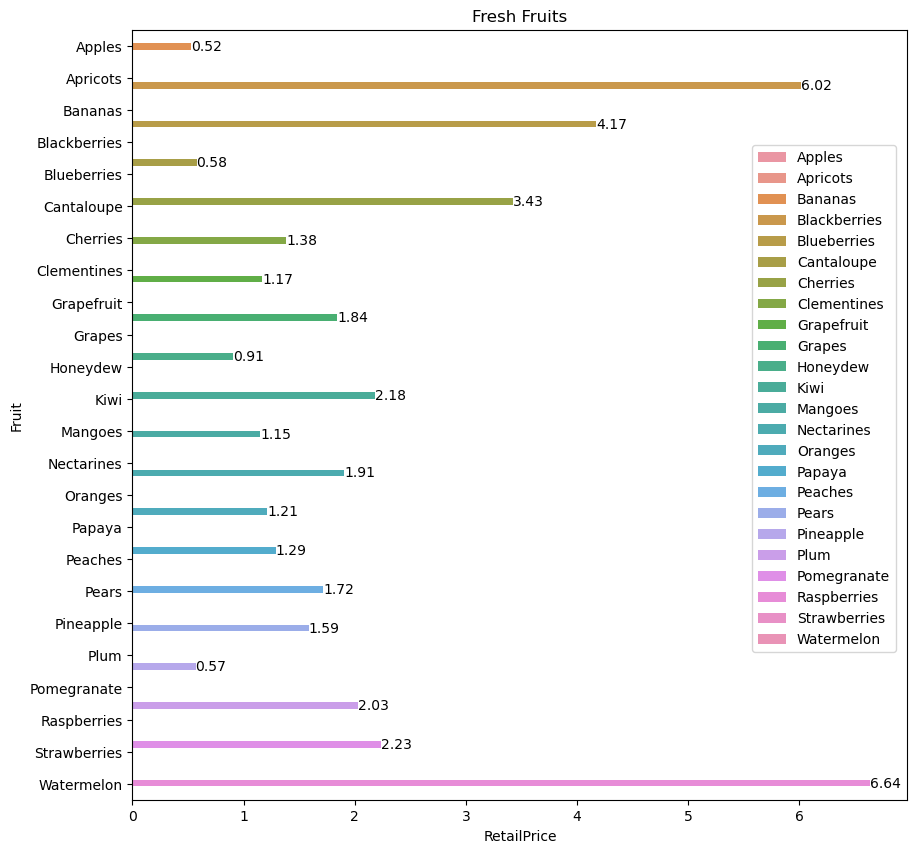

In [37]:
fig,axe = plt.subplots(figsize = (10,10))
sns.barplot(data = data[data['Form'] == 'Fresh'],y='Fruit',x='RetailPrice',hue='Fruit',width=5)
plt.title("Fresh Fruits")
axe.legend(bbox_to_anchor=(0.8, 0.85), loc=2, borderaxespad=0.)

for p in axe.patches:
    width = p.get_width()
    if not np.isfinite(width):
        continue
    axe.annotate(f'{width:.2f}', 
                 xy=(width, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center')

plt.show()


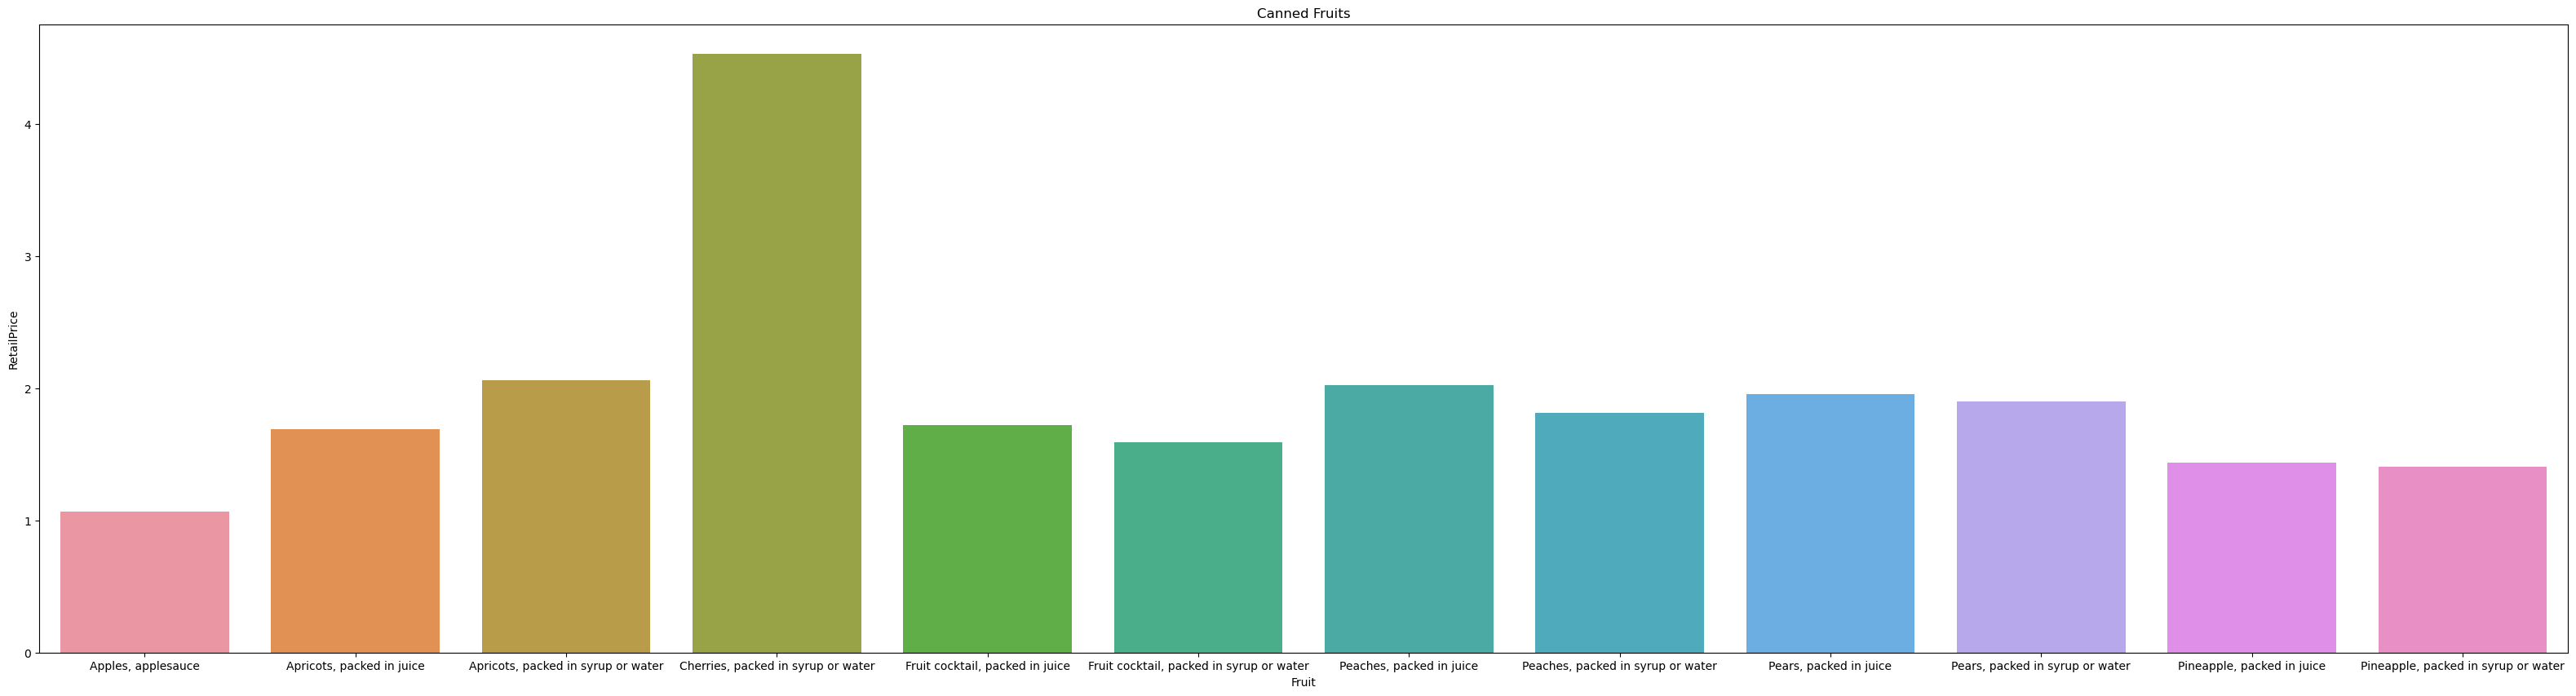

In [46]:
fig,axe = plt.subplots(figsize = (40,10))
sns.barplot(data = data[data['Form'] == 'Canned'],x ='Fruit',y='RetailPrice' )
plt.title("Canned Fruits")
plt.show()

In [118]:
data

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Juice_frozen_or_ready,FruitLabel
0,Apples,Fresh,1.5193,per pound,0.90,0.2425,pounds,0.4094,NaN,Apples
1,"Apples, applesauce",Canned,1.0660,per pound,1.00,0.5401,pounds,0.5758,NaN,Apples
2,"Apples, ready-to-drink",Juice,0.7804,per pint,1.00,8.0000,fluid ounces,0.3902,ready,Apples
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.00,8.0000,fluid ounces,0.2926,frozen,Apples
4,Apricots,Fresh,2.9665,per pound,0.93,0.3638,pounds,1.1603,NaN,Apricots
...,...,...,...,...,...,...,...,...,...,...
57,Raspberries,Fresh,6.6391,per pound,0.96,0.3197,pounds,2.2107,NaN,Raspberries
58,Raspberries,Frozen,4.1877,per pound,1.00,0.3307,pounds,1.3849,NaN,Raspberries
59,Strawberries,Fresh,2.5800,per pound,0.94,0.3197,pounds,0.8774,NaN,Strawberries
60,Strawberries,Frozen,2.8189,per pound,1.00,0.3307,pounds,0.9322,NaN,Strawberries


In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


features = ['Fruit', 'Form', 'RetailPrice', 'Yield', 'CupEquivalentSize']
target = 'CupEquivalentPrice'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['RetailPrice', 'Yield', 'CupEquivalentSize']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Fruit', 'Form'])
    ])


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.6027613719905985


In [130]:
y_pred

array([ 0.48713101,  2.24390569,  0.15202639,  0.29785935,  2.88842494,
        2.98597716,  0.73663014,  0.46457197,  2.91668074,  0.20366972,
       -0.44759218,  1.18376461,  1.54985547])

In [131]:
y_test

30    1.1091
32    1.3219
33    0.6696
48    0.9543
51    0.3486
35    0.4921
11    1.2025
45    1.2868
2     0.3902
43    0.6412
26    0.6250
4     1.1603
10    2.0037
Name: CupEquivalentPrice, dtype: float64

In [134]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=0))])

rf_pipeline.fit(X_train, y_train)

rf_y_pred = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')


Random Forest Mean Squared Error: 0.09012416221499997


In [136]:
rf_y_pred

array([1.254165, 1.017454, 1.035323, 0.870541, 0.363534, 0.526265,
       1.123773, 1.166052, 0.389842, 0.784717, 1.007633, 1.200472,
       1.151452])

In [137]:
y_test

30    1.1091
32    1.3219
33    0.6696
48    0.9543
51    0.3486
35    0.4921
11    1.2025
45    1.2868
2     0.3902
43    0.6412
26    0.6250
4     1.1603
10    2.0037
Name: CupEquivalentPrice, dtype: float64